deskripsi

In [ ]:
import pandas as pd # type: ignore
import numpy as np # type: ignore

# Library untuk visualisasi
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

# library untuk analisis time series
from statsmodels.tsa.seasonal import seasonal_decompose # type: ignore
from statsmodels.tsa.stattools import adfuller # type: ignore
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # type: ignore

# Library untuk forecasting
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing # type: ignore
from statsmodels.tsa.arima.model import ARIMA # type: ignore
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error # type: ignore


# memanggil dataset

In [2]:
df = pd.read_excel('usage.xlsx')

# deskripsi dataset

In [3]:
df.head()

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location
0,1,56,Male,2.61,7.15,24,4.43,0.55,2.40,Los Angeles
1,2,46,Male,2.13,13.79,18,4.67,4.42,2.43,Chicago
2,3,32,Female,7.28,4.50,11,4.58,1.71,2.83,Houston
3,4,25,Female,1.20,6.29,21,3.18,3.42,4.58,Phoenix
4,5,38,Male,6.31,12.59,14,3.15,0.13,4.00,New York


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User_ID                       1000 non-null   int64  
 1   Age                           1000 non-null   int64  
 2   Gender                        1000 non-null   object 
 3   Total_App_Usage_Hours         1000 non-null   float64
 4   Daily_Screen_Time_Hours       1000 non-null   float64
 5   Number_of_Apps_Used           1000 non-null   int64  
 6   Social_Media_Usage_Hours      1000 non-null   float64
 7   Productivity_App_Usage_Hours  1000 non-null   float64
 8   Gaming_App_Usage_Hours        1000 non-null   float64
 9   Location                      1000 non-null   object 
dtypes: float64(5), int64(3), object(2)
memory usage: 78.3+ KB


In [ ]:
import pandas as pd # type: ignore
import numpy as np # type: ignore

# Library untuk visualisasi
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

from sklearn.cluster import KMeans # type: ignore

In [6]:
df = pd.read_excel('usage.xlsx')

In [7]:
df.head()

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location
0,1,56,Male,2.61,7.15,24,4.43,0.55,2.40,Los Angeles
1,2,46,Male,2.13,13.79,18,4.67,4.42,2.43,Chicago
2,3,32,Female,7.28,4.50,11,4.58,1.71,2.83,Houston
3,4,25,Female,1.20,6.29,21,3.18,3.42,4.58,Phoenix
4,5,38,Male,6.31,12.59,14,3.15,0.13,4.00,New York


#persiapan dataset

In [8]:
df.rename(index=str, columns={
    'Total_App_Usage_Hours': 'App_Usage',
    'Daily_Screen_Time_Hours': 'Daily_Screen_Time',
    'Social_Media_Usage_Hours': 'Social_Media',
    'Productivity_App_Usage_Hours': 'Productivity_App',
    'Gaming_App_Usage_Hours': 'Gaming_App'  
}, inplace=True)

In [9]:
X = df.drop(['User_ID', 'Gender', 'Location'], axis=1)

In [10]:
print(X)

     Age  App_Usage  Daily_Screen_Time  Number_of_Apps_Used  Social_Media  \
0     56       2.61               7.15                   24          4.43   
1     46       2.13              13.79                   18          4.67   
2     32       7.28               4.50                   11          4.58   
3     25       1.20               6.29                   21          3.18   
4     38       6.31              12.59                   14          3.15   
..   ...        ...                ...                  ...           ...   
995   41       3.58              12.46                   13          4.12   
996   32       9.65              10.51                   11          1.02   
997   46      11.68              10.06                    9          2.35   
998   25       3.89              10.78                   15          4.00   
999   22       3.99               7.05                    4          0.90   

     Productivity_App  Gaming_App  
0                0.55        2.40  
1  

# elbow

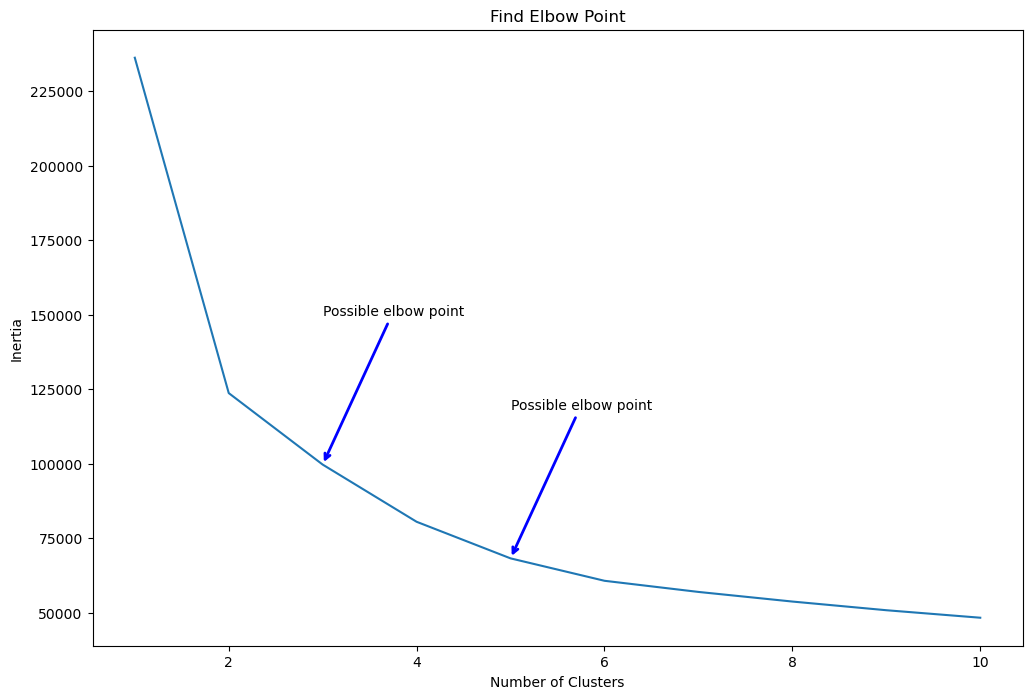

In [ ]:
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
from sklearn.cluster import KMeans # type: ignore

# Pastikan X sudah didefinisikan sebelumnya sebagai data untuk klasterisasi

clusters = []
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

# Membuat plot
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)

# Menambahkan judul dan label
ax.set_title('Find Elbow Point')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Inertia')

# Menambahkan anotasi untuk titik elbow pertama (misalnya klaster 3)
ax.annotate('Possible elbow point', 
            xy=(3, clusters[2]),  # Titik koordinat untuk elbow pertama (klaster 3)
            xytext=(3, clusters[2] + 50000),  # Posisi teks
            xycoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

# Menambahkan anotasi untuk titik elbow kedua (misalnya klaster 5)
ax.annotate('Possible elbow point', 
            xy=(5, clusters[4]),  # Titik koordinat untuk elbow kedua (klaster 5)
            xytext=(5, clusters[4] + 50000),  # Posisi teks
            xycoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

# Menampilkan plot
plt.show()


# Clustering

In [12]:
n_clust = 4
kmean = KMeans(n_clusters=n_clust).fit(X)
X['Labels'] = kmean.labels_

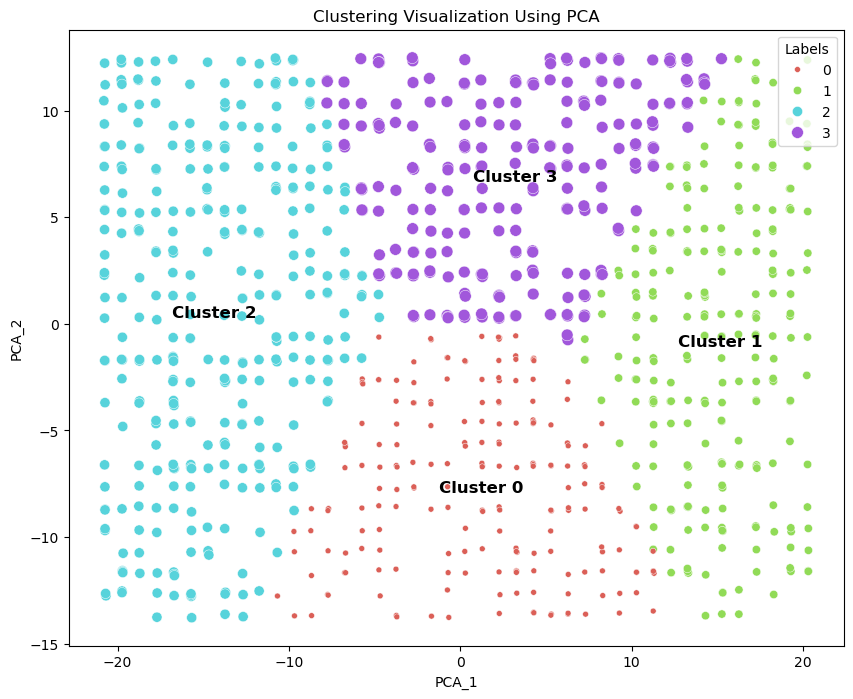

In [ ]:
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
from sklearn.decomposition import PCA # type: ignore

# Misalnya, kita menggunakan PCA untuk mereduksi data ke dua dimensi
X_reduced = X[['Age','App_Usage', 'Daily_Screen_Time', 'Number_of_Apps_Used', 'Social_Media', 'Productivity_App', 'Gaming_App']]
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_reduced)

# Menambahkan hasil PCA ke DataFrame untuk plotting
X['PCA_1'] = X_pca[:, 0]
X['PCA_2'] = X_pca[:, 1]

# Membuat scatterplot dengan dua dimensi yang baru (PCA_1 dan PCA_2)
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA_1', y='PCA_2', hue='Labels', size='Labels', data=X, palette=sns.color_palette('hls', n_colors=len(X['Labels'].unique())))

# Menambahkan anotasi untuk setiap label
for label in X['Labels'].unique():
    label_data = X[X['Labels'] == label]
    plt.annotate(f'Cluster {label}',
                 (label_data['PCA_1'].mean(), label_data['PCA_2'].mean()),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=12, weight='bold',
                 color='black')

plt.title('Clustering Visualization Using PCA')
plt.show()


In [14]:
print(X)

     Age  App_Usage  Daily_Screen_Time  Number_of_Apps_Used  Social_Media  \
0     56       2.61               7.15                   24          4.43   
1     46       2.13              13.79                   18          4.67   
2     32       7.28               4.50                   11          4.58   
3     25       1.20               6.29                   21          3.18   
4     38       6.31              12.59                   14          3.15   
..   ...        ...                ...                  ...           ...   
995   41       3.58              12.46                   13          4.12   
996   32       9.65              10.51                   11          1.02   
997   46      11.68              10.06                    9          2.35   
998   25       3.89              10.78                   15          4.00   
999   22       3.99               7.05                    4          0.90   

     Productivity_App  Gaming_App  Labels      PCA_1      PCA_2  
0        

In [17]:
X.to_excel("output_cluster.xlsx")